Most unsophisticated crypto & financial journalists, reporters write in a hurried fashion that BTC price is correlated directly to the NASDAQ and SP500; given these simplistic and hasty statements let's explore these correlations with the help of python.  

The goal is to explore any potential correlation, positive or negative, between BTC prices and main financial markets indexes.
Given the QE, intense money printing by the Fed since the onset of the Covid crisis we will fetch data from January 1st 2020.
Quantitative Easing consists in central banks agressively buying back debt securities, the response to the economic uncertainty induced by the spread of Covid came also with cuts in federal funds rate targets plus massively expanding their repo operations to alleviate and support financial institutions. This approach was adopted by almost all central banks aroud the globe, increasing the money supply globally by 9 trillions.

Taking this into consideration, it seems reasonable to extract the data for our correlation analysis since January 2020.

Sources:
https://www.brookings.edu/research/fed-response-to-covid19/
https://www.atlanticcouncil.org/global-qe-tracker/

******************This is not financial advice.*****************
The Content is for informational purposes only, you should not construe any such information or other material as legal, tax, investment, financial, or other advice. 

All Content on this site, thecrypp.com, is information of a general nature and does not address the circumstances of any particular individual or entity. Nothing in the Site constitutes professional and/or financial advice, nor does any information on the Site constitute a comprehensive or complete statement of the matters discussed or the law relating thereto. 

Investing in cryptocurrencies, digital assets, NFTs & DeFi platforms conveys high risks of financial losses.
Do your own research.

****************************************************************

In [21]:
pip install TeX

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for TeX, since package 'wheel' is not installed.
  Running setup.py install for TeX: started
  Running setup.py install for TeX: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [10]:
#Setup Packages 
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib as matplot
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import requests
import json
from pandas.plotting import register_matplotlib_converters

In [12]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\Fluffy\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for multitasking, since package 'wheel' is not installed.
    Running setup.py install for multitasking: started
    Running setup.py install for multitasking: finished with status 'done'


In [13]:
#importing BTC daily data from yahoo finance

import yfinance as yf
#Setting today's date
today_date = datetime.today().strftime("%Y-%m-%d")

btc_data = yf.download("BTC-USD", start = "2021-01-01", end_date = today_date)
#Clean BTC dataframe by dropping some columns
btc_data.drop(["High","Low", "Adj Close"], axis = 1, inplace = True)
btc_data.rename(columns={"Open":"BTC-Open", "Close":"BTC-Close", "Volume":"BTC-Volume"}, inplace= True)
btc_data.head()

[*********************100%***********************]  1 of 1 completed


,BTC-Open,BTC-Close,BTC-Volume
Date,,,
2021-01-01,28994.009766,29374.152344,40730301359
2021-01-02,29376.455078,32127.267578,67865420765
2021-01-03,32129.408203,32782.023438,78665235202
2021-01-04,32810.949219,31971.914062,81163475344
2021-01-05,31977.041016,33992.429688,67547324782


In [15]:
#Defining our indexes of interest and importing the data from yahoo finance
all_data = btc_data.copy()

# data =  pd.to_datetime()
today_date = datetime.today().strftime("%Y-%m-%d")
start_date = "2018-01-01"
asset_dict = {
    "^GSPC": "SP500",
    "DAX": "DAX",
    "^N225": "N225",
    "^GDAXI":"DAX-Performance-Ind",
    "^DJI": "DOW",
    "^IXIC": "NASDAQ",
    "^VIX": "VOLATILITY",
    "^RUT": "RUSSELL 2000",
    "^HSI": "HANG SENG",
    "^FCHI" : "CAC40",
    "^BFX": 'BEL 20',
    "ETH-USD": "ETHUSD",
    "DX-Y.NYB": "DXY"
}

col_list = []
for key, value in asset_dict.items():
    print(key, value)
    try:
        df_temp = web.DataReader(
            key, start = start_date, end=today_date, data_source="yahoo")
    except ValueError:
        print(f'{key} symbol not found')
    df_temp.index = pd.to_datetime(df_temp.index)
    df_temp.rename(columns={"Close": value}, inplace= True)
    all_data = pd.merge(
        left = all_data,
        right = df_temp[value],
        how = "inner",
        left_index = True, right_index = True)

all_data.head()


^GSPC SP500
DAX DAX
^N225 N225
^GDAXI DAX-Performance-Ind
^DJI DOW
^IXIC NASDAQ
^VIX VOLATILITY
^RUT RUSSELL 2000
^HSI HANG SENG
^FCHI CAC40
^BFX BEL 20
ETH-USD ETHUSD
DX-Y.NYB DXY


,BTC-Open,BTC-Close,BTC-Volume,SP500,DAX,N225,DAX-Performance-Ind,DOW,NASDAQ,VOLATILITY,RUSSELL 2000,HANG SENG,CAC40,BEL 20,ETHUSD,DXY
Date,,,,,,,,,,,,,,,,
2021-01-04,32810.949219,31971.914062,81163475344,3700.649902,31.000999,27258.380859,13726.740234,30223.890625,12698.450195,26.969999,1945.910034,27472.810547,5588.959961,3664.239990,1040.233032,89.879997
2021-01-05,31977.041016,33992.429688,67547324782,3726.860107,31.155001,27158.630859,13651.219727,30391.599609,12818.959961,25.340000,1979.109985,27649.859375,5564.600098,3647.209961,1100.006104,89.440002
2021-01-06,34013.613281,36824.363281,75289433811,3748.139893,31.618999,27055.939453,13891.969727,30829.400391,12740.790039,25.070000,2057.919922,27692.300781,5630.600098,3719.010010,1207.112183,89.529999
2021-01-07,36833.875000,39371.042969,84762141031,3803.790039,31.809999,27490.130859,13968.240234,31041.130859,13067.480469,22.370001,2096.889893,27548.519531,5669.850098,3744.280029,1225.678101,89.830002
2021-01-08,39381.765625,40797.609375,88107519480,3824.679932,31.879000,28139.029297,14049.530273,31097.970703,13201.980469,21.559999,2091.659912,27878.220703,5706.879883,3761.879883,1224.197144,90.099998


In the next part we plot the graphs for each index to get a general sense of direction and correlations.

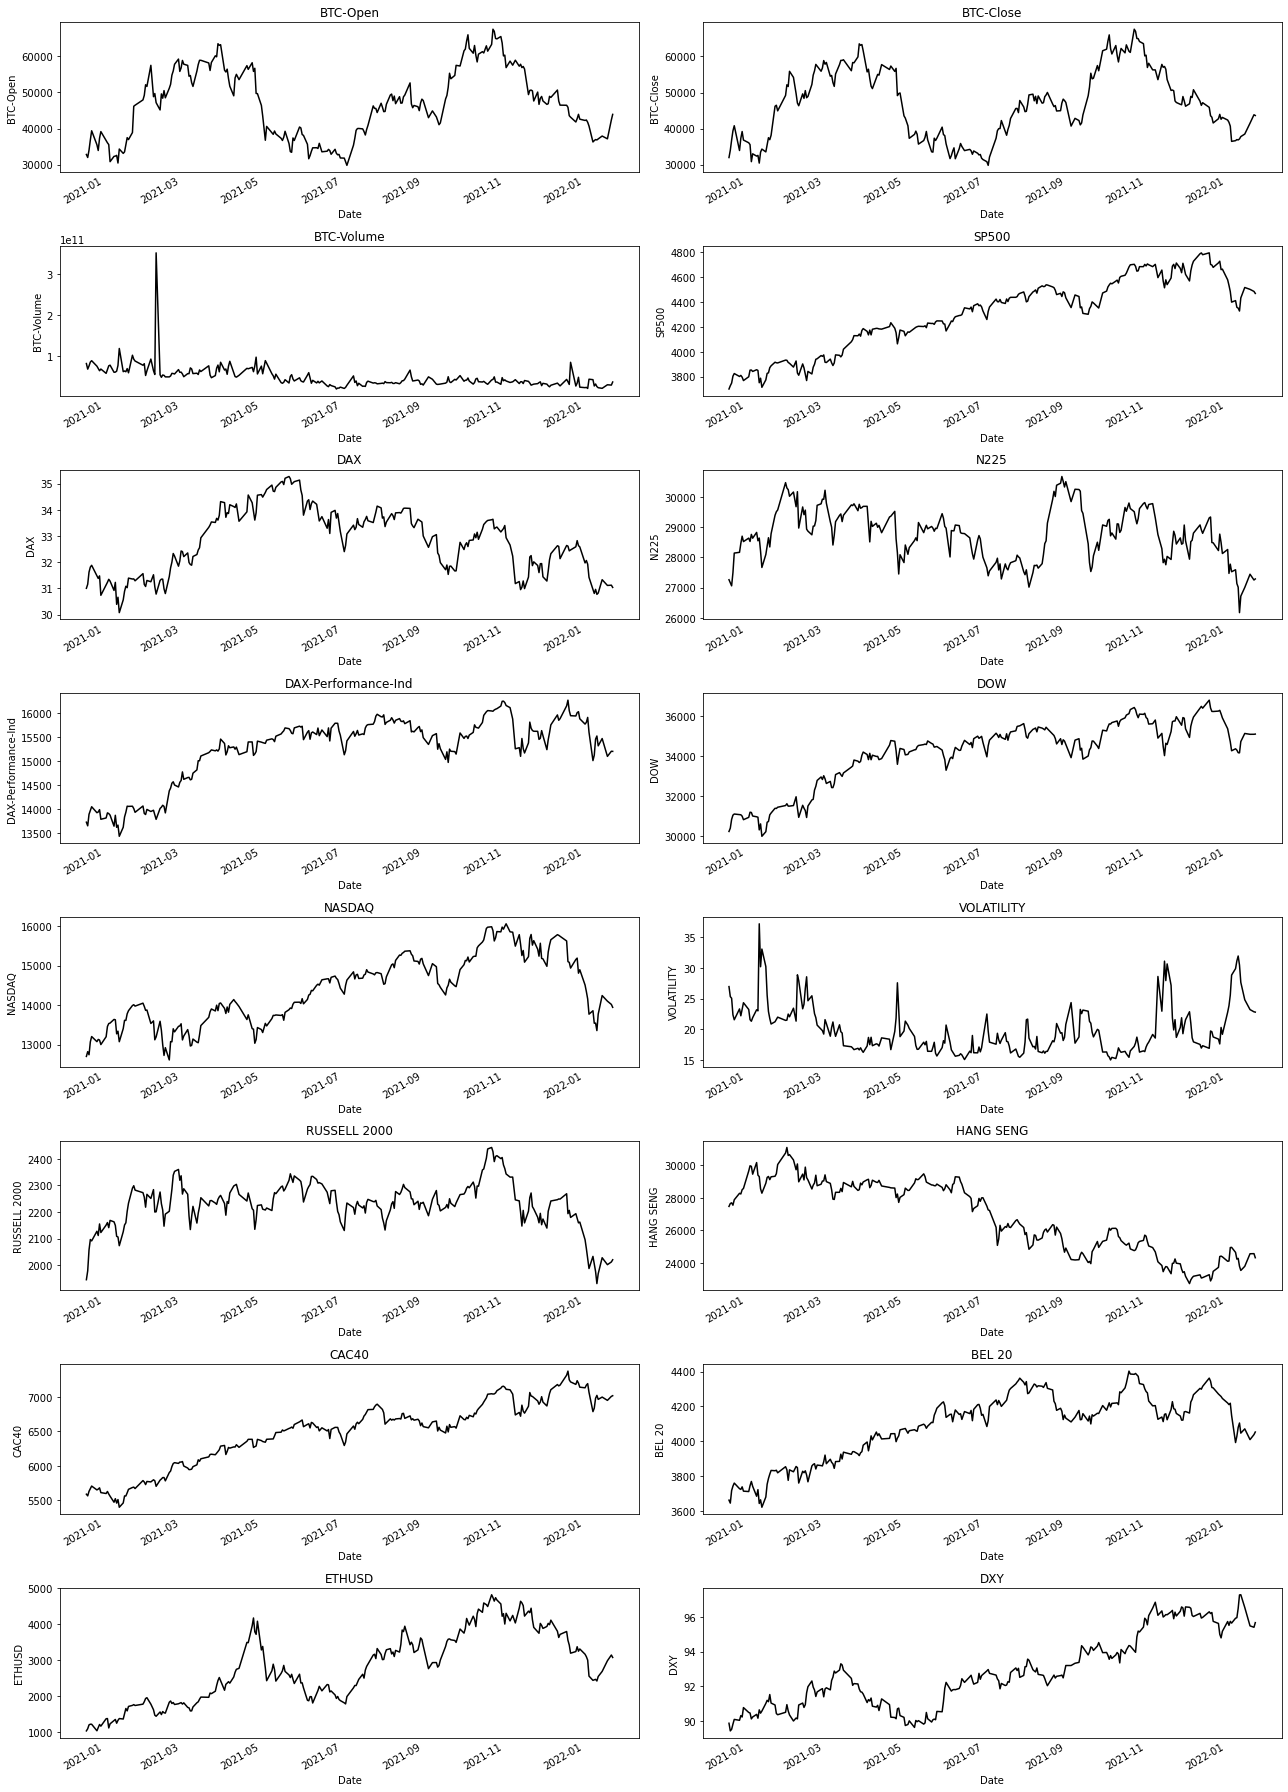

In [ ]:
#Plotting each dataset for each index
df_plot = all_data.copy()
list_length = df_plot.shape[1]
ncols = 2
nrows = int(round(list_length/ ncols, 0))

fig, ax = plt.subplots(nrows = nrows, ncols = ncols, sharex = True, figsize=(18,25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(0, list_length):
    ax = plt.subplot(nrows, ncols, i+1)
    sns.lineplot(data = df_plot.iloc[:, i], ax = ax, color = "black")
    ax.set_title(df_plot.columns[i])
    ax.tick_params(axis = "x", rotation = 30, labelsize = 10, length = 0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

Pearson correlation coefficients are in range -1,1. We differentiate 4 cases:
Positive coefficient is closer to 1 implies a direct correlation.
Negative coeffiient is closer to -1 implies an inverse correlation.
Coefficient closer to 0 or equal to 0 implies a weaker correlation.

A correlation coefficient, whether positive or negative may be misinterpreted, in fact we should solely stick to stating the strength of the correlation and if the correlation is direct or inverse; however, explaining why this correlation, direct or inverse relationship exists is not possible with Pearson Correlation.

In [16]:
#Diagonal correlation matrix

corr_df = pd.DataFrame(all_data, columns= col_list)
corr = all_data.corr()
corr

,BTC-Open,BTC-Close,BTC-Volume,SP500,DAX,N225,DAX-Performance-Ind,DOW,NASDAQ,VOLATILITY,RUSSELL 2000,HANG SENG,CAC40,BEL 20,ETHUSD,DXY
BTC-Open,1.000000,0.977988,0.048333,0.257401,0.016729,0.434496,0.203338,0.283385,0.299032,-0.208293,0.445869,-0.182402,0.201739,0.190267,0.542060,0.293047
BTC-Close,0.977988,1.000000,0.049496,0.231787,-0.000363,0.420087,0.170991,0.256957,0.281661,-0.220372,0.443857,-0.170234,0.170457,0.166283,0.523038,0.272589
BTC-Volume,0.048333,0.049496,1.000000,-0.553045,-0.177418,0.157639,-0.536916,-0.547242,-0.473871,0.242072,-0.060375,0.459197,-0.560184,-0.548814,-0.379639,-0.455669
SP500,0.257401,0.231787,-0.553045,1.000000,0.268120,-0.087461,0.877365,0.951321,0.916641,-0.383969,0.242926,-0.833670,0.957670,0.909996,0.858529,0.779612
DAX,0.016729,-0.000363,-0.177418,0.268120,1.000000,0.153733,0.640565,0.488706,0.201762,-0.746629,0.537376,0.157119,0.324001,0.521369,0.224378,-0.291136
N225,0.434496,0.420087,0.157639,-0.087461,0.153733,1.000000,-0.044588,-0.070315,0.088519,-0.279693,0.601501,0.288186,-0.141899,-0.099929,0.033592,-0.174767
DAX-Performance-Ind,0.203338,0.170991,-0.536916,0.877365,0.640565,-0.044588,1.000000,0.954478,0.739201,-0.586403,0.360567,-0.588103,0.915200,0.944517,0.722036,0.530489
DOW,0.283385,0.256957,-0.547242,0.951321,0.488706,-0.070315,0.954478,1.000000,0.811538,-0.541015,0.326919,-0.706274,0.947528,0.937725,0.817086,0.643766
NASDAQ,0.299032,0.281661,-0.473871,0.916641,0.201762,0.088519,0.739201,0.811538,1.000000,-0.425317,0.424636,-0.722231,0.793103,0.829142,0.804756,0.676650
VOLATILITY,-0.208293,-0.220372,0.242072,-0.383969,-0.746629,-0.279693,-0.586403,-0.541015,-0.425317,1.000000,-0.671617,-0.030398,-0.345396,-0.538840,-0.271327,0.069630


C:\Users\Fluffy\AppData\Local\Temp/ipykernel_23140/391619012.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype = np.bool))


<AxesSubplot:>

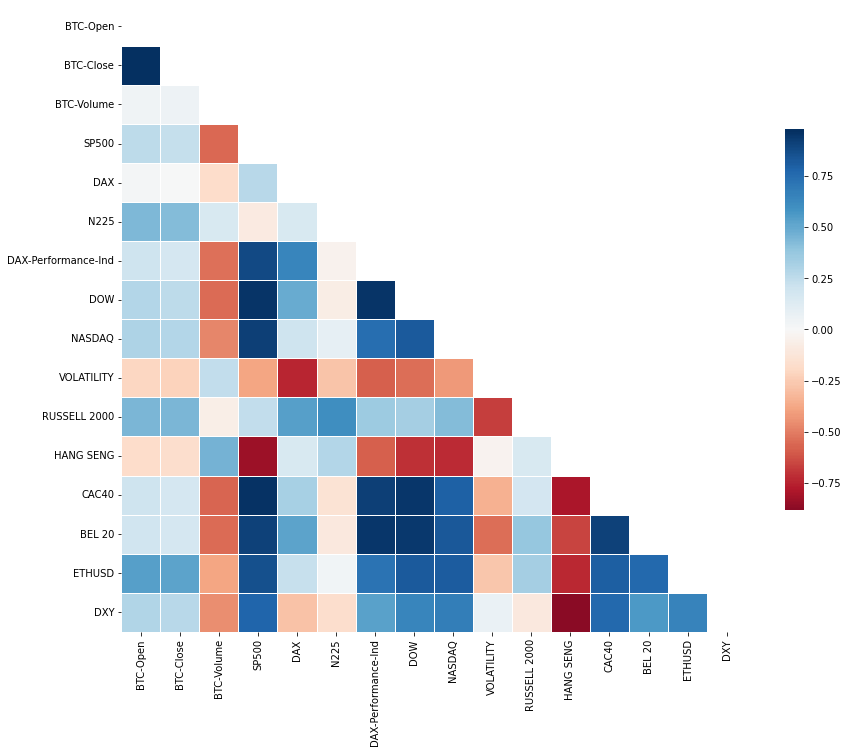

In [17]:
# #Visualizing the Correlation Matrix in heatmap

mask = np.triu(np.ones_like(corr, dtype = np.bool))
#Defining matplotlib figure
f, ax = plt.subplots(figsize=(14,14))
#Choosing colors to show divergence
cmap = "RdBu"

#Generate heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center = 0,
    square = True,
    linewidths = 0.5,
    cbar_kws={"shrink":0.5}
)

The heatmap above relies on a color palette ranging from blue -positive correlation- through white -no correlation- all the way to red color -negative correlation-.
The different shades between the three colors visualize the correlation's strength between each index/instrument, thus allowing to visually detect the type correlation, positive, negative or non-existent. We also must keep in mind that we may be unaware of non linear correlation in some of the explored pairs.

My main motivation is exploring the correlation between Bitcoin price action, trend and the traditional markets indexes and when it comes to the king of crypto looking at the heatmap the most vivid correlations are the following:

Bitcoin-Volume positive correlation with HangSeng.
Bitcoin-Volume negative correlation with SP500.
Bitcoin-Volume negative correlation with DOW.
Bitcoin-Volume negative correlation with NASDAQ.
Bitcoin-Volume negative correlation with CAC40.
Bitcoin-Volume negative correlation with BEL20.
Bitcoin-Volume negative correlation with VOLATILITY.

Surprisingly, while I expected BTC's price to display a strong positive relationship with the main stock market indexes, ETH reveals a stronger positive relationship with the main traditional indexes. In fact, for BTC we can only note the light blue color at the intersections with SP500 DOW NIKKEI NASDAQ CAC40 BEL20, with r coefficient in a weak range between 0.2 & 0.29. ETH shows strong r values ranging between 0.73 and 0.86, thus revealing a strong positive correlation with SP500 DOW DAX-Performance-Ind NASDAQ CAC40 BEL20.

Besides cryptocurrencies, DXY, an index which measures the strength of the US$ versus a basket of the main global currencies, is showing a blood red correlation with the HangSeng, a strong inverse correlation between the prices of major companies listed on the Hong-Kong stock exchange and demand for the US$. This negative relationship is also obvious between the major stock markets indexes, SP500 DOW NASDAQ CAC40 BEL20, and the Hang Seng. 

_________________

This EDA pushes me to explore further correlations such as crypto prices vs stablecoins printings, crypto vs different QEs announcements, crypto vs inflation rates, crypto vs funding rate on the futures markets.

I must admit that despite the findings of the above correlation this needs deeper research given the recent BTC pump since the start of February 2022 while NASDAQ & SP500 are stalling; these correlations are not set in stones as trading/investing rules but shall more be considered in terms of trend confirmation. 

******************This is not financial advice.*****************
The Content is for informational purposes only, you should not construe any such information or other material as legal, tax, investment, financial, or other advice. 

All Content on this site, thecrypp.com, is information of a general nature and does not address the circumstances of any particular individual or entity. Nothing in the Site constitutes professional and/or financial advice, nor does any information on the Site constitute a comprehensive or complete statement of the matters discussed or the law relating thereto. 

Investing in cryptocurrencies, digital assets, NFTs & DeFi platforms conveys high risks of financial losses.
Do your own research.

****************************************************************